# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Wholesale_data.csv')


In [116]:
# Check for missing values
print(data.isnull().sum())

# Basic statistics
print(data.describe())


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.93181

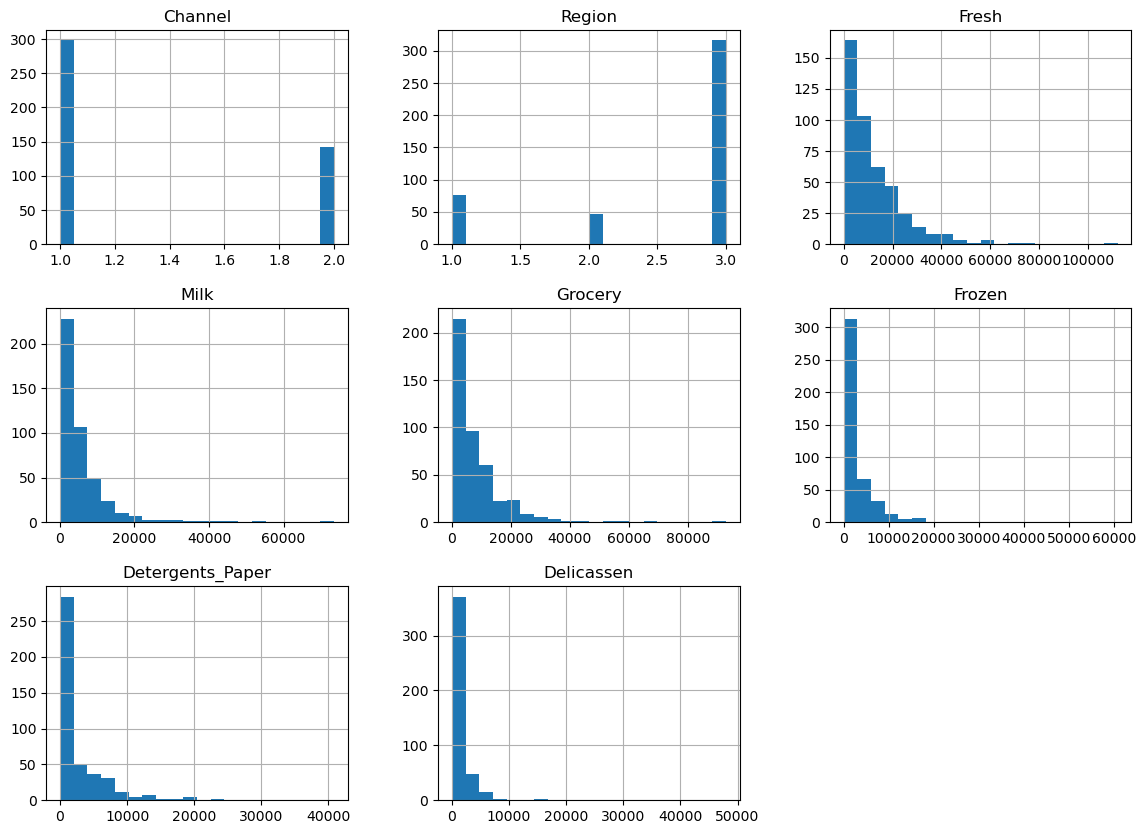

In [117]:
# Histograms
data.hist(bins=20, figsize=(14,10))
plt.show()


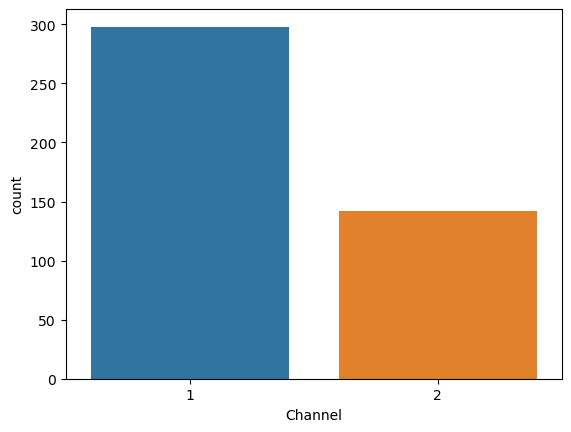

In [118]:
# Count plot for Channel and Region
sns.countplot(x='Channel', data=data)
plt.show()

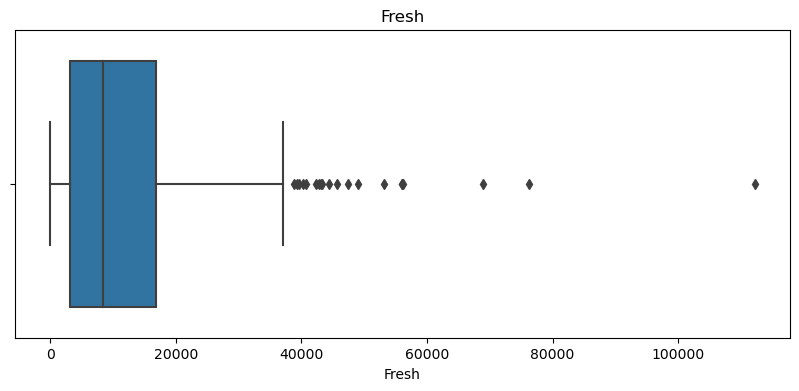

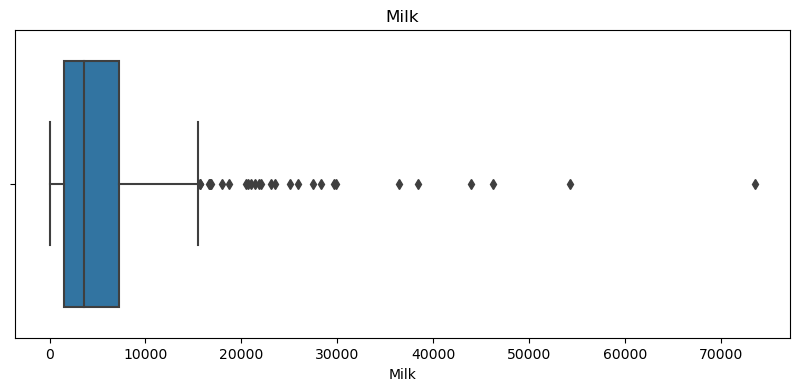

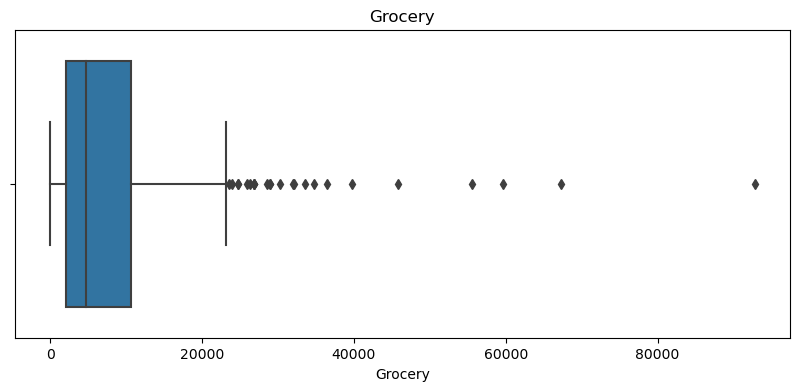

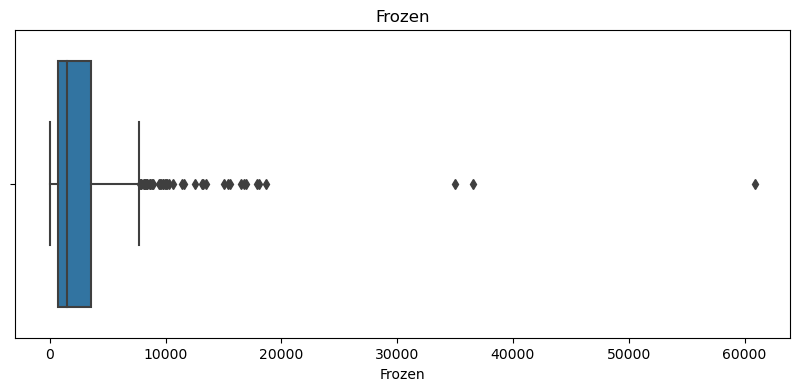

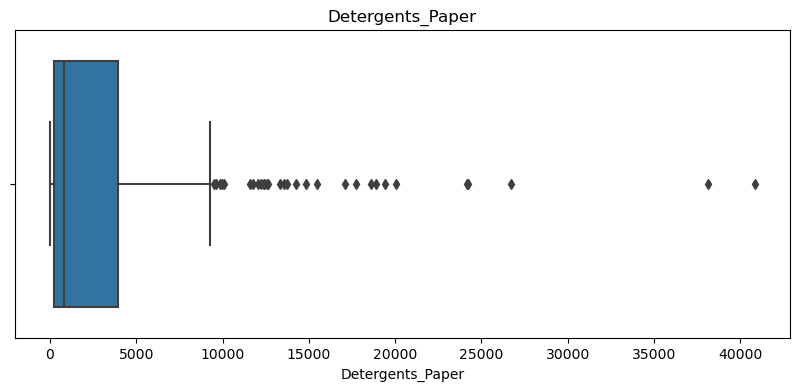

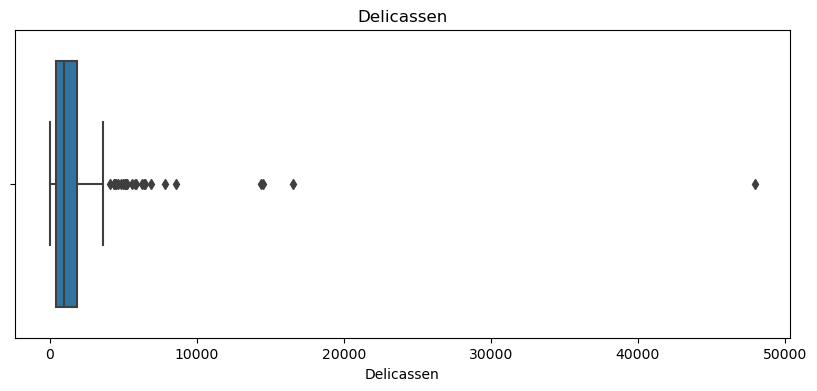

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Deal with outliers
columns_to_check = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
for column in columns_to_check:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column])
    plt.title(column)
    plt.show()


In [120]:
from scipy import stats
import numpy as np

# Assuming 'data' is the DataFrame and 'columns_to_check' contains the column names
z = np.abs(stats.zscore(data[columns_to_check]))
outlier_positions = np.where(z > 3)

# Print out the indices of outliers
for row, column in zip(outlier_positions[0], outlier_positions[1]):
    print(f"Outlier found in row {row}, column {columns_to_check[column]}")


Outlier found in row 23, column Milk
Outlier found in row 23, column Delicassen
Outlier found in row 39, column Fresh
Outlier found in row 47, column Milk
Outlier found in row 47, column Grocery
Outlier found in row 47, column Detergents_Paper
Outlier found in row 56, column Milk
Outlier found in row 56, column Detergents_Paper
Outlier found in row 61, column Milk
Outlier found in row 61, column Grocery
Outlier found in row 61, column Detergents_Paper
Outlier found in row 65, column Grocery
Outlier found in row 65, column Detergents_Paper
Outlier found in row 71, column Delicassen
Outlier found in row 85, column Milk
Outlier found in row 85, column Grocery
Outlier found in row 85, column Detergents_Paper
Outlier found in row 86, column Milk
Outlier found in row 86, column Detergents_Paper
Outlier found in row 87, column Delicassen
Outlier found in row 92, column Detergents_Paper
Outlier found in row 93, column Frozen
Outlier found in row 103, column Fresh
Outlier found in row 103, colu

After some research, to understand the nature of the data, in a wholesale dataset, large purchases might be normal for certain clients, like big supermarkets or distributors. So, an outlier might not necessarily be an error or an anomaly.

In clustering (KMeans), outliers can have a significant impact as they can skew the calculation of centroids, and in PCA, outliers can also affect the principal components as PCA is sensitive to the scale of the data. 

In [121]:
import numpy as np

# Columns to transform (excluding 'Channel' and 'Region')
columns_to_transform = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Apply log transformation
data_transformed = data.copy()
data_transformed[columns_to_transform] = np.log(data_transformed[columns_to_transform] + 1)


In [122]:
from scipy import stats

# Calculate Z-scores on transformed data
z_transformed = np.abs(stats.zscore(data_transformed[columns_to_transform]))
outlier_positions_transformed = np.where(z_transformed > 3)

# Print out the indices of outliers after transformation
for row, column in zip(outlier_positions_transformed[0], outlier_positions_transformed[1]):
    print(f"Outlier found in row {row}, column {columns_to_transform[column]}")


Outlier found in row 66, column Fresh
Outlier found in row 75, column Grocery
Outlier found in row 75, column Detergents_Paper
Outlier found in row 95, column Fresh
Outlier found in row 96, column Fresh
Outlier found in row 98, column Milk
Outlier found in row 109, column Delicassen
Outlier found in row 128, column Delicassen
Outlier found in row 142, column Delicassen
Outlier found in row 154, column Milk
Outlier found in row 154, column Grocery
Outlier found in row 154, column Delicassen
Outlier found in row 161, column Detergents_Paper
Outlier found in row 183, column Delicassen
Outlier found in row 184, column Delicassen
Outlier found in row 187, column Delicassen
Outlier found in row 218, column Fresh
Outlier found in row 233, column Delicassen
Outlier found in row 338, column Fresh
Outlier found in row 357, column Fresh
Outlier found in row 420, column Frozen


This is a positive sign due to transformation, because the number of outliers have reduced to a more reasonal amount, I would drop these extreme outliers.

In [123]:
# Convert the outlier positions to a set of unique row indices
outlier_indices_to_remove = set(outlier_positions_transformed[0])

# Drop these rows from the DataFrame
data_cleaned = data_transformed.drop(index=outlier_indices_to_remove)

# Optionally, reset the index of the new DataFrame
data_cleaned.reset_index(drop=True, inplace=True)


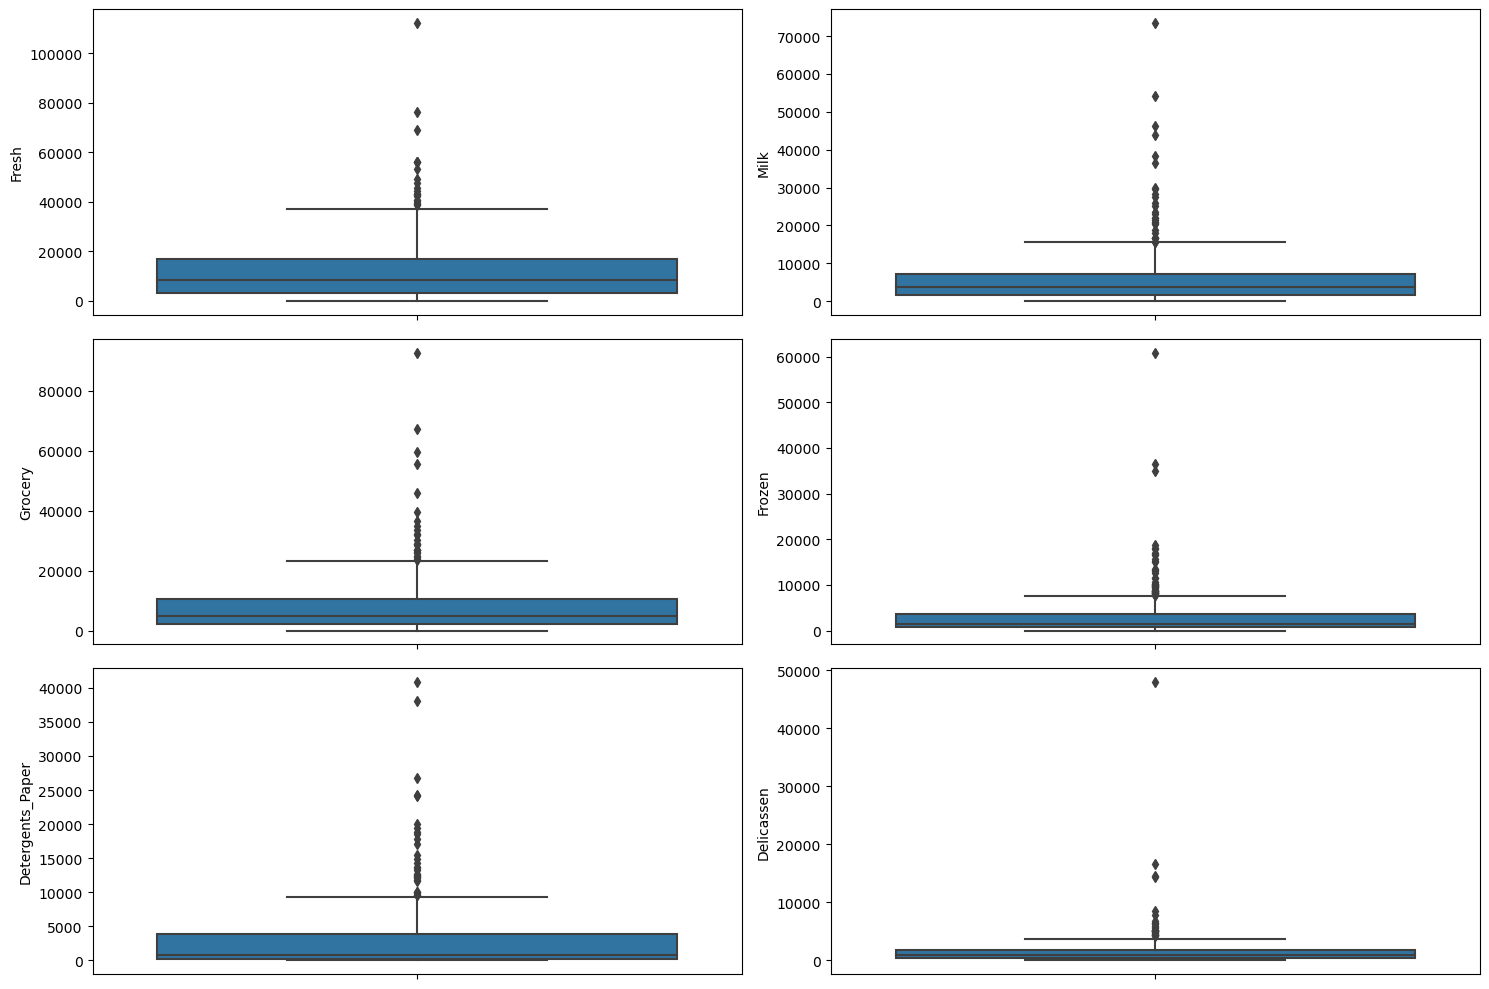

In [124]:
# Improved box plots
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
sns.boxplot(y=data['Fresh'], ax=ax[0, 0])
sns.boxplot(y=data['Milk'], ax=ax[0, 1])
sns.boxplot(y=data['Grocery'], ax=ax[1, 0])
sns.boxplot(y=data['Frozen'], ax=ax[1, 1])
sns.boxplot(y=data['Detergents_Paper'], ax=ax[2, 0])
sns.boxplot(y=data['Delicassen'], ax=ax[2, 1])
plt.tight_layout()
plt.show()


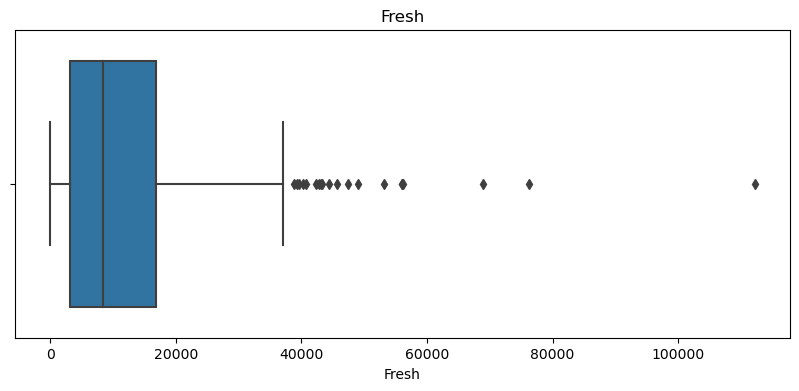

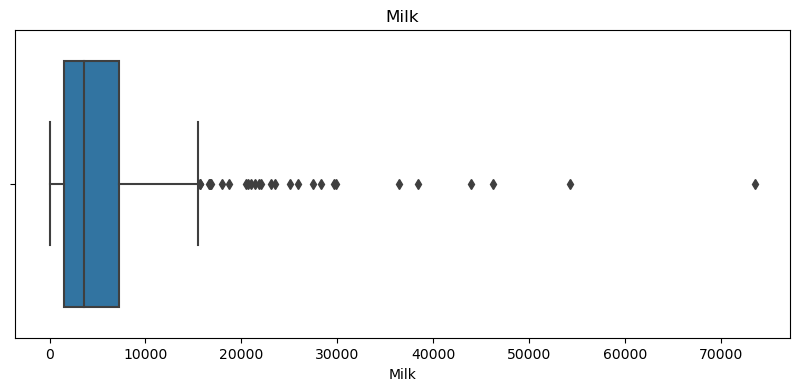

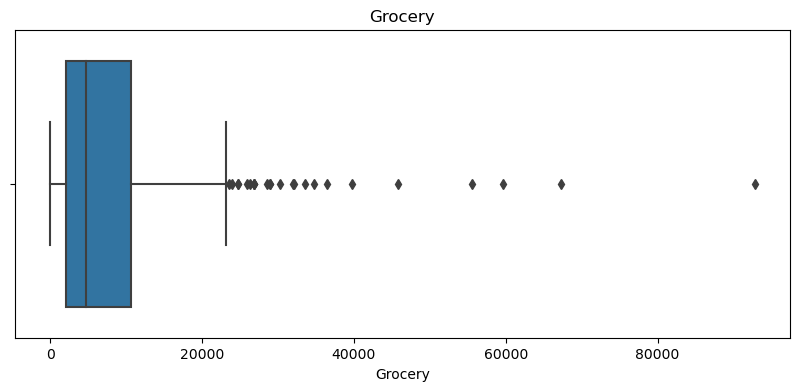

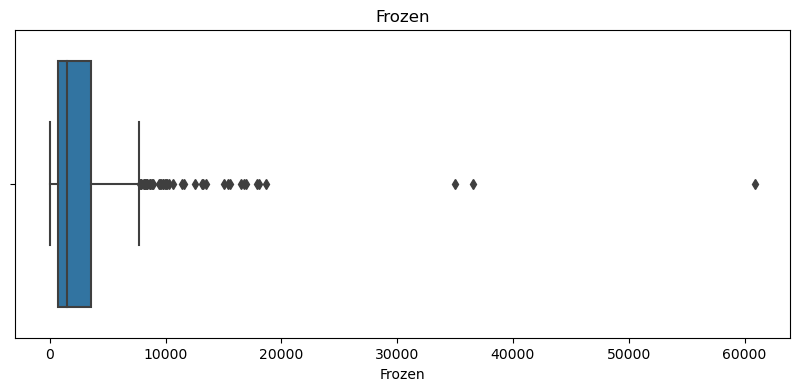

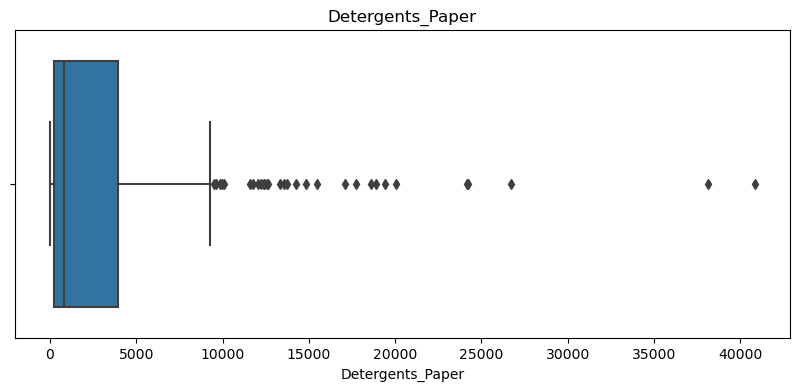

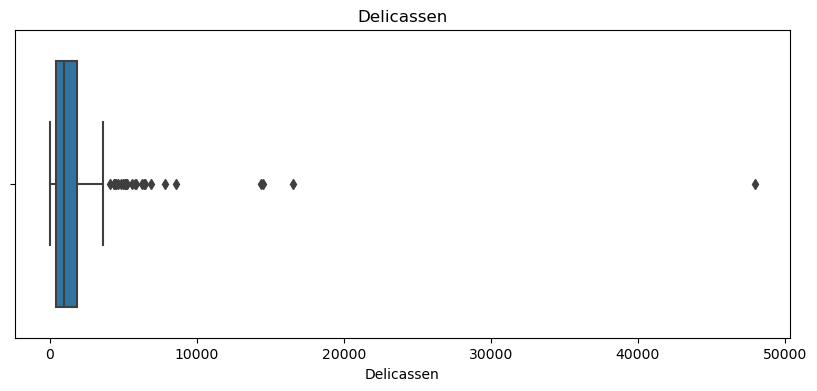

In [125]:
# Closer look
columns_to_check = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
for column in columns_to_check:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column])
    plt.title(column)
    plt.show()

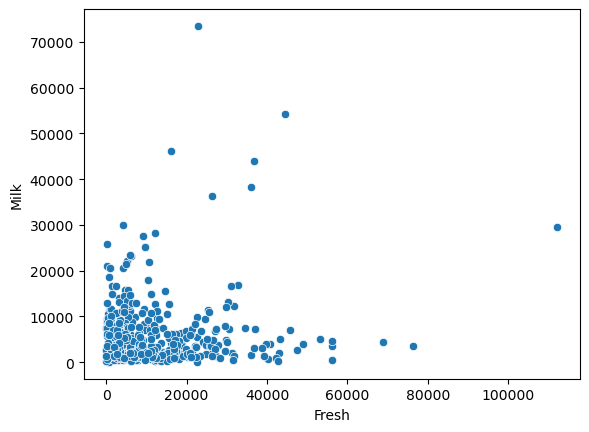

In [126]:
# Scatter plot 
sns.scatterplot(x='Fresh', y='Milk', data=data)
plt.show()


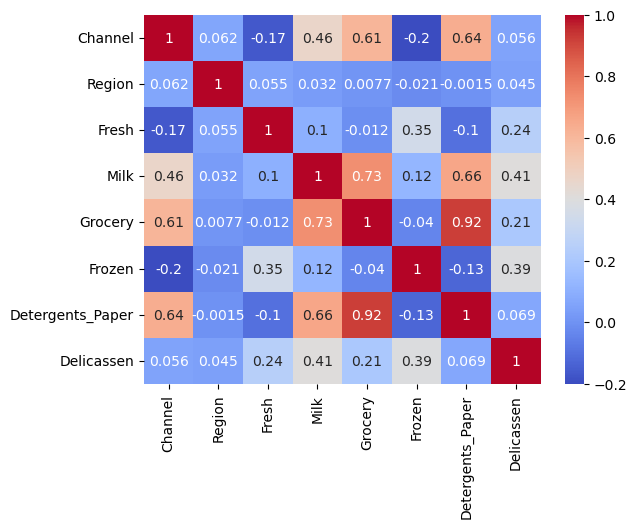

In [127]:
# Correlation matrix
corr = data.corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [128]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [130]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data (excluding non-numeric columns if present)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))

# Convert back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data.select_dtypes(include=['float64', 'int64']).columns)


/Users/akumanic/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


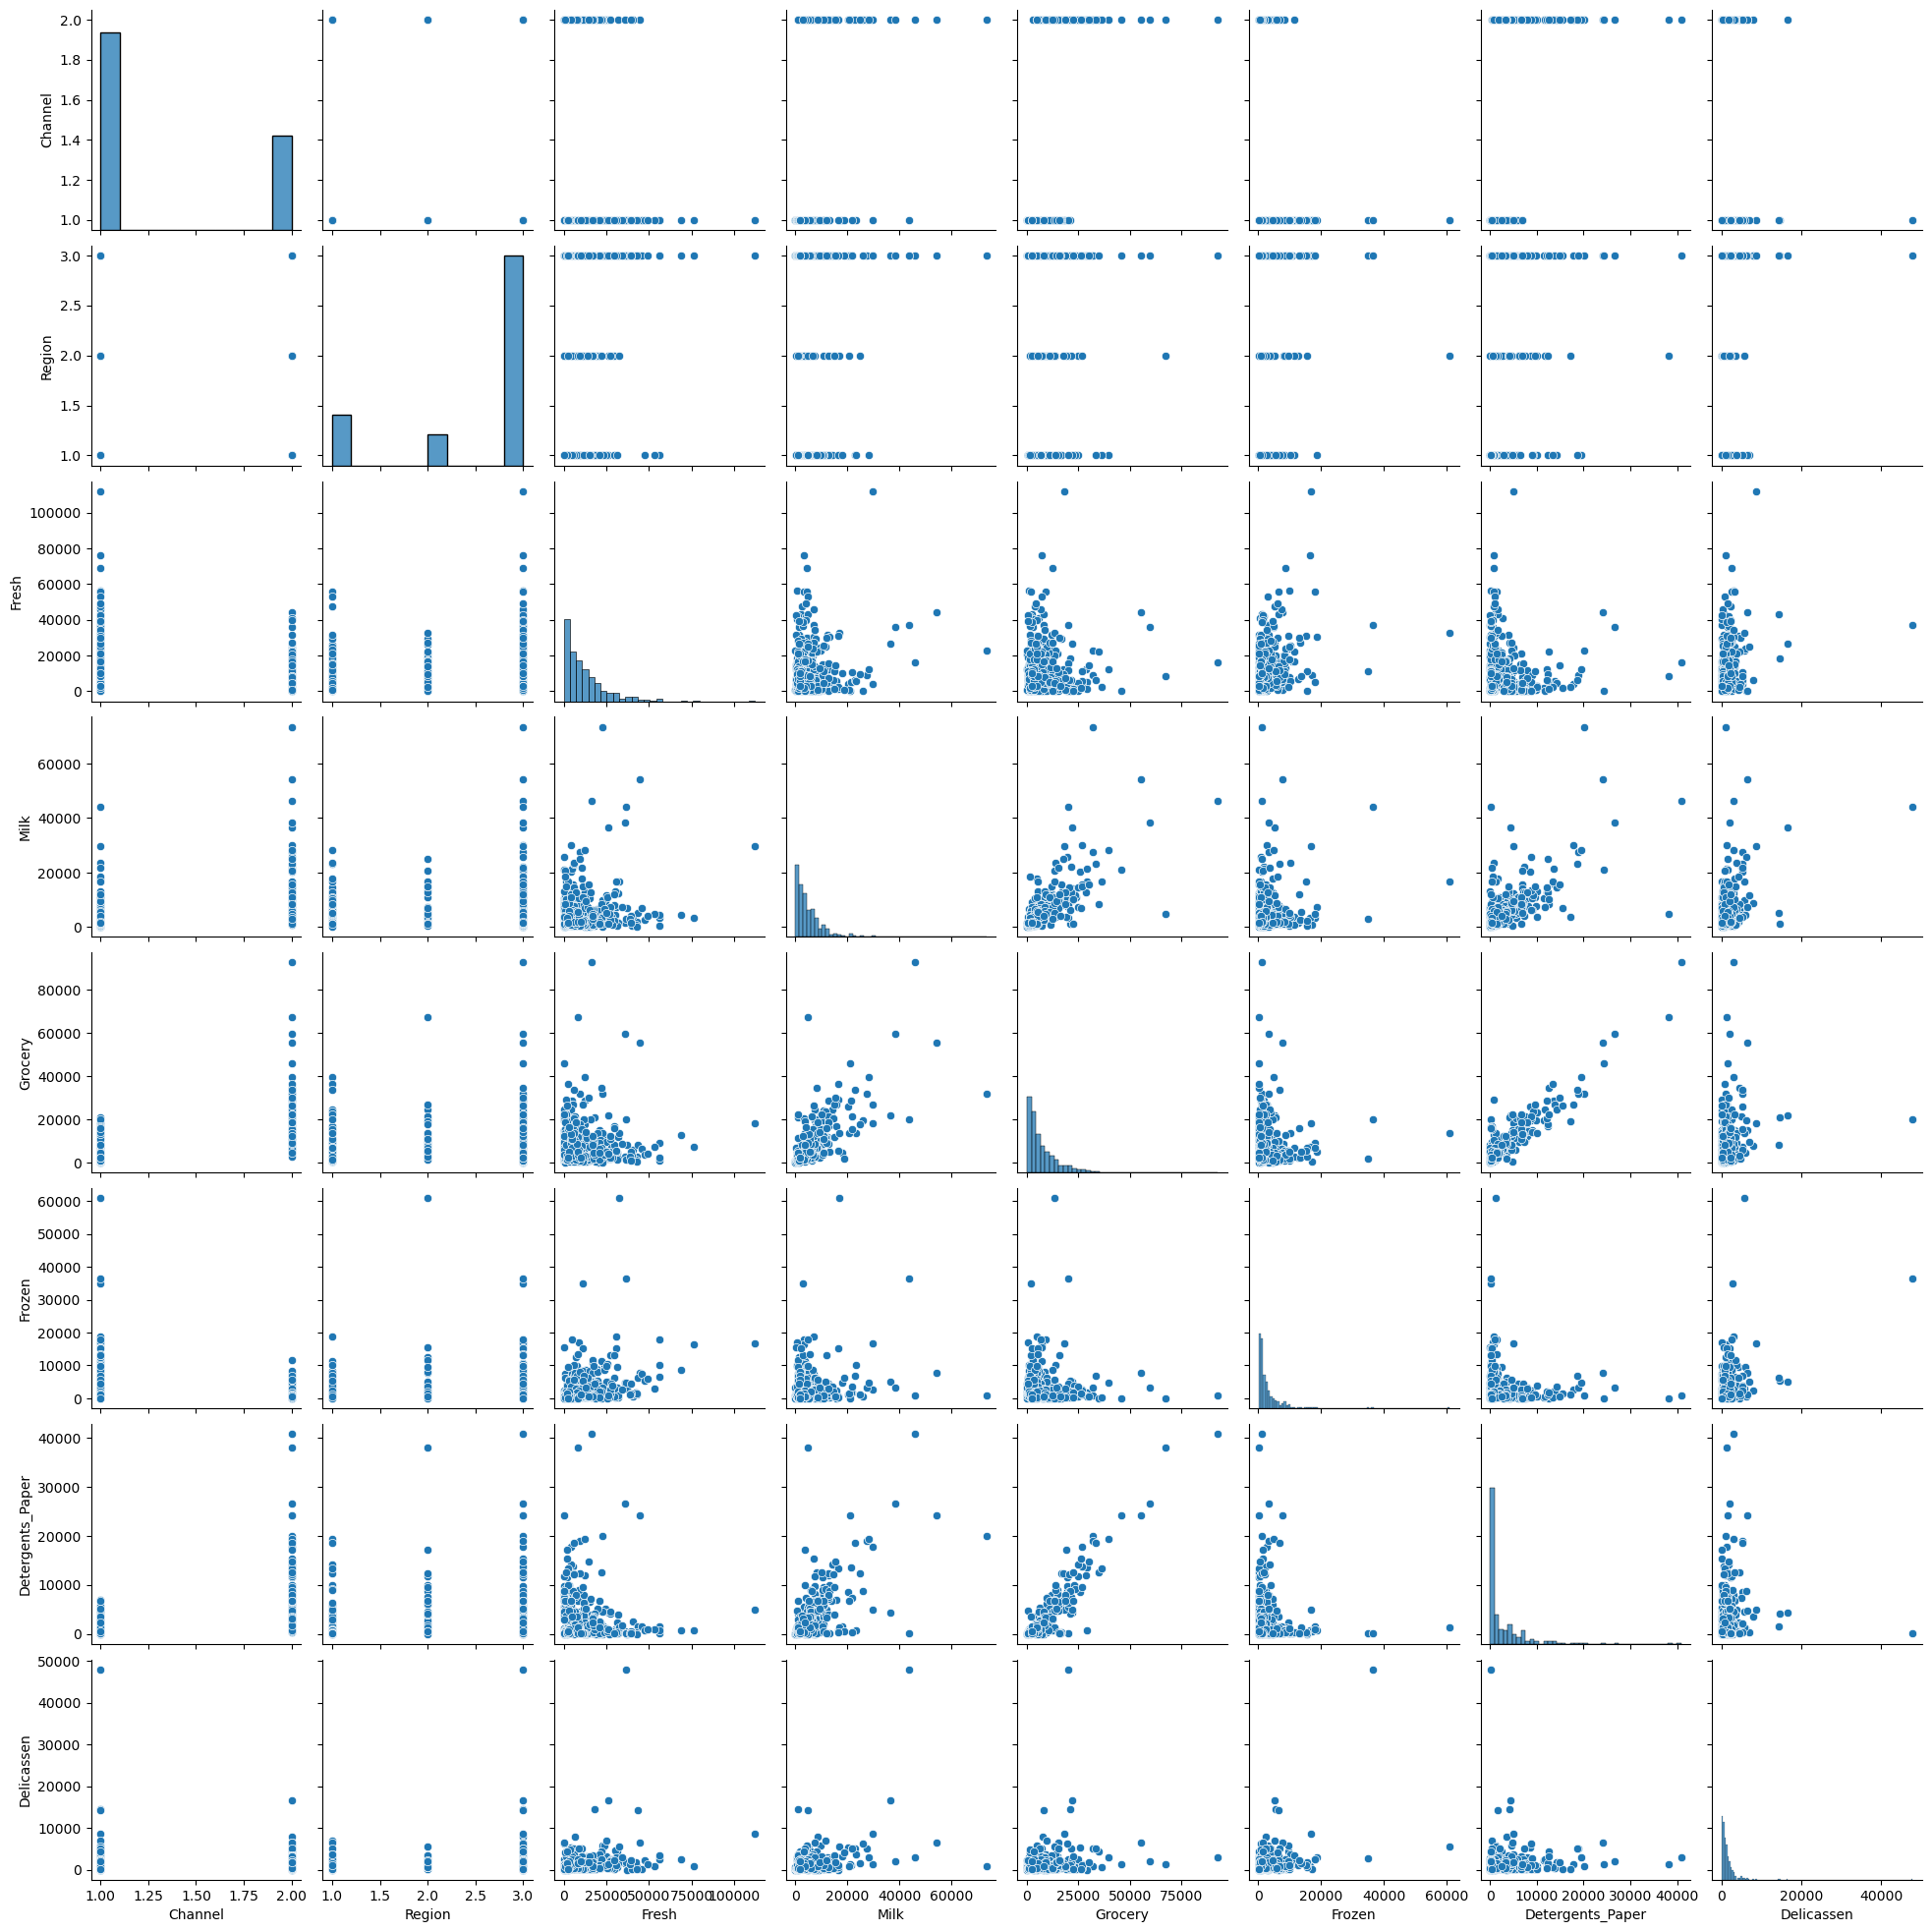

In [131]:
# Pair plot
sns.pairplot(data)
plt.show()


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

/Users/akumanic/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/akumanic/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/akumanic/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/akumanic/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

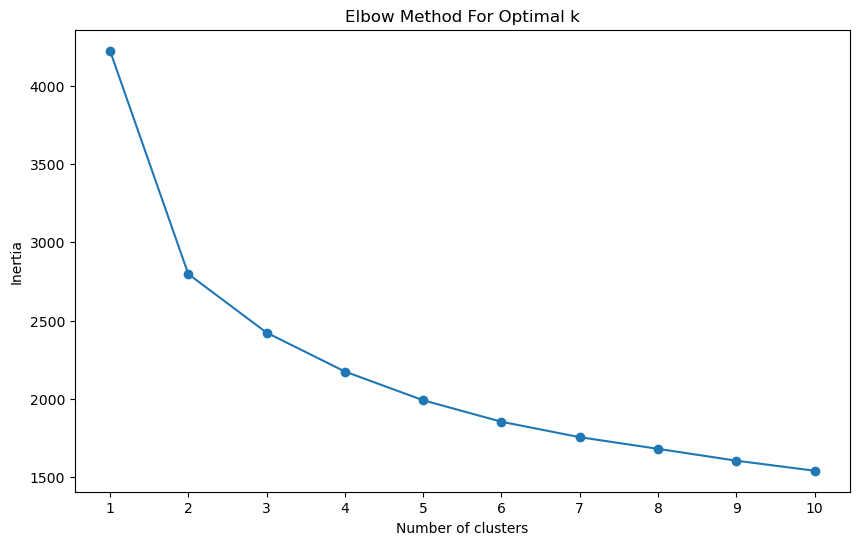

In [132]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range
range_clusters = range(1, 11)

# Inertia for each number of clusters
inertia = []
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_cleaned)
    inertia.append(kmeans.inertia_)

# Plotting 
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range_clusters)
plt.show()


In [133]:
#  4
optimal_clusters = 4

# Applying KMeans
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(data_cleaned)

# Adding the cluster labels to the original dataset for further analysis
data_cleaned['Cluster'] = kmeans.labels_


/Users/akumanic/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [134]:
print(data_cleaned['Cluster'].value_counts())


Cluster
3    141
1    116
2    102
0     63
Name: count, dtype: int64


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

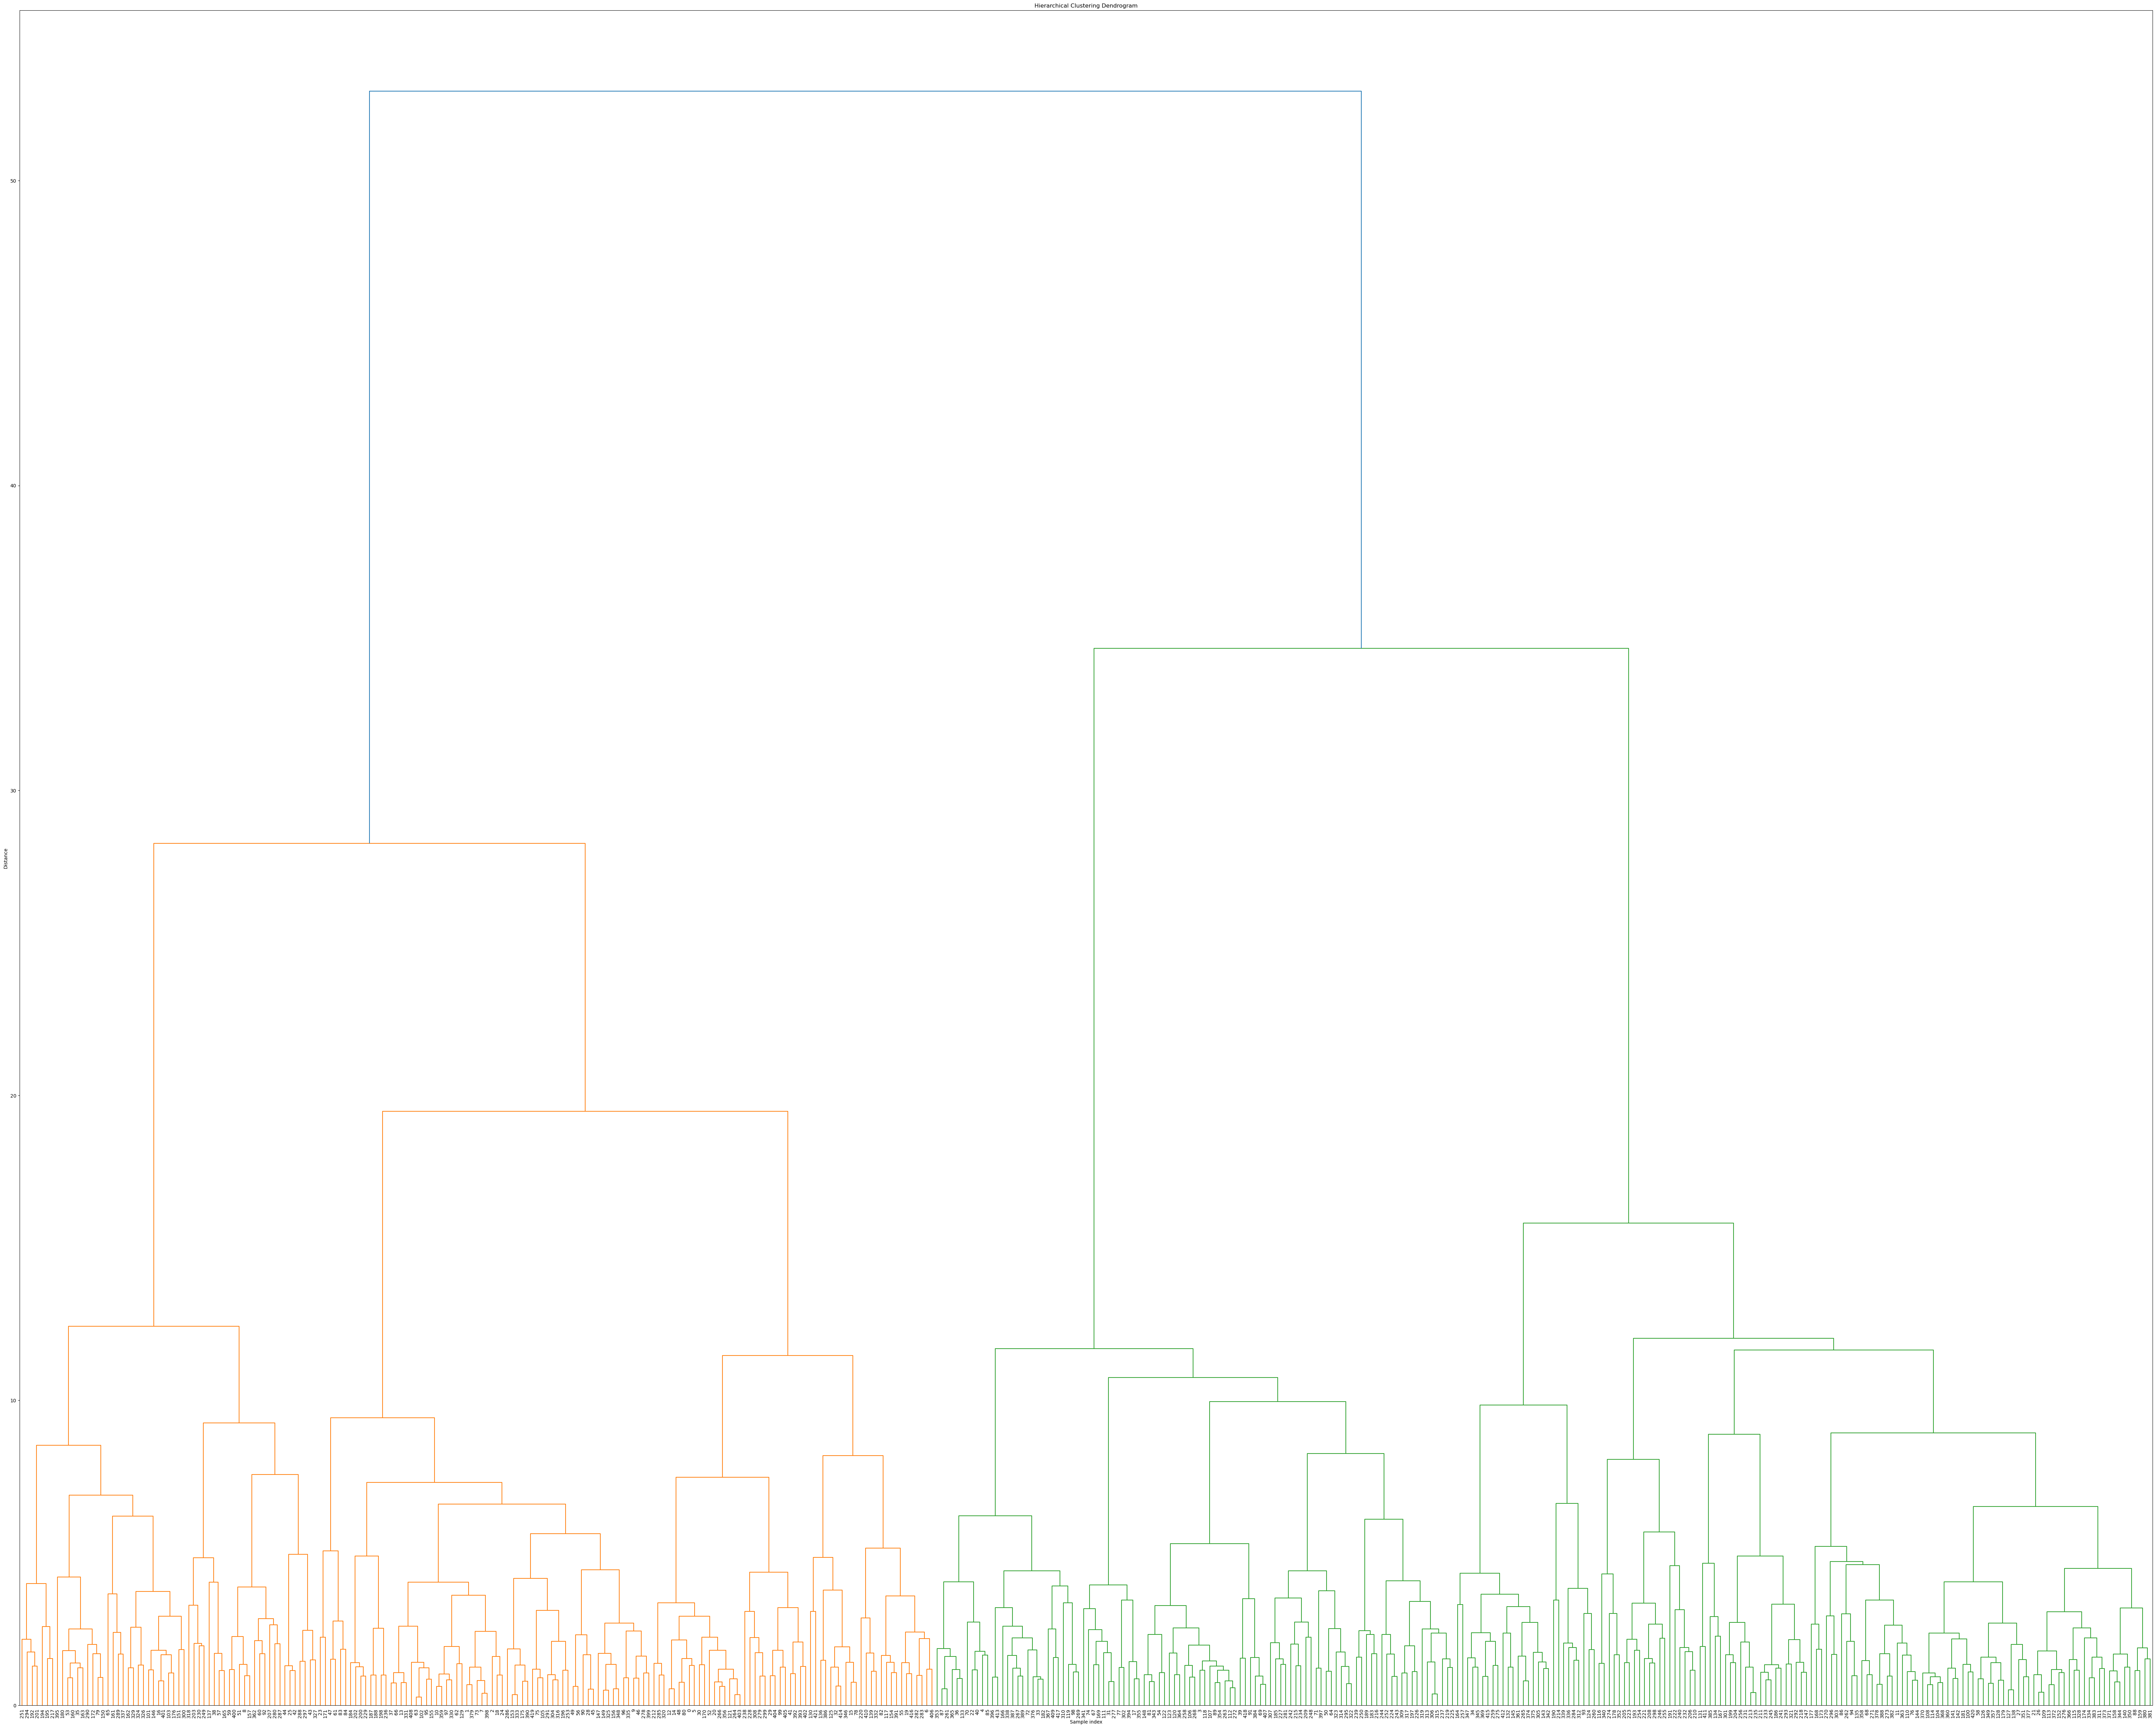

In [135]:
# Plot the dendrogram with larger figure size
plt.figure(figsize=(80, 64))  
dendrogram(Z, leaf_rotation=90, leaf_font_size=10)  
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.savefig('dendrogram.png')  # Save to a file
plt.show()


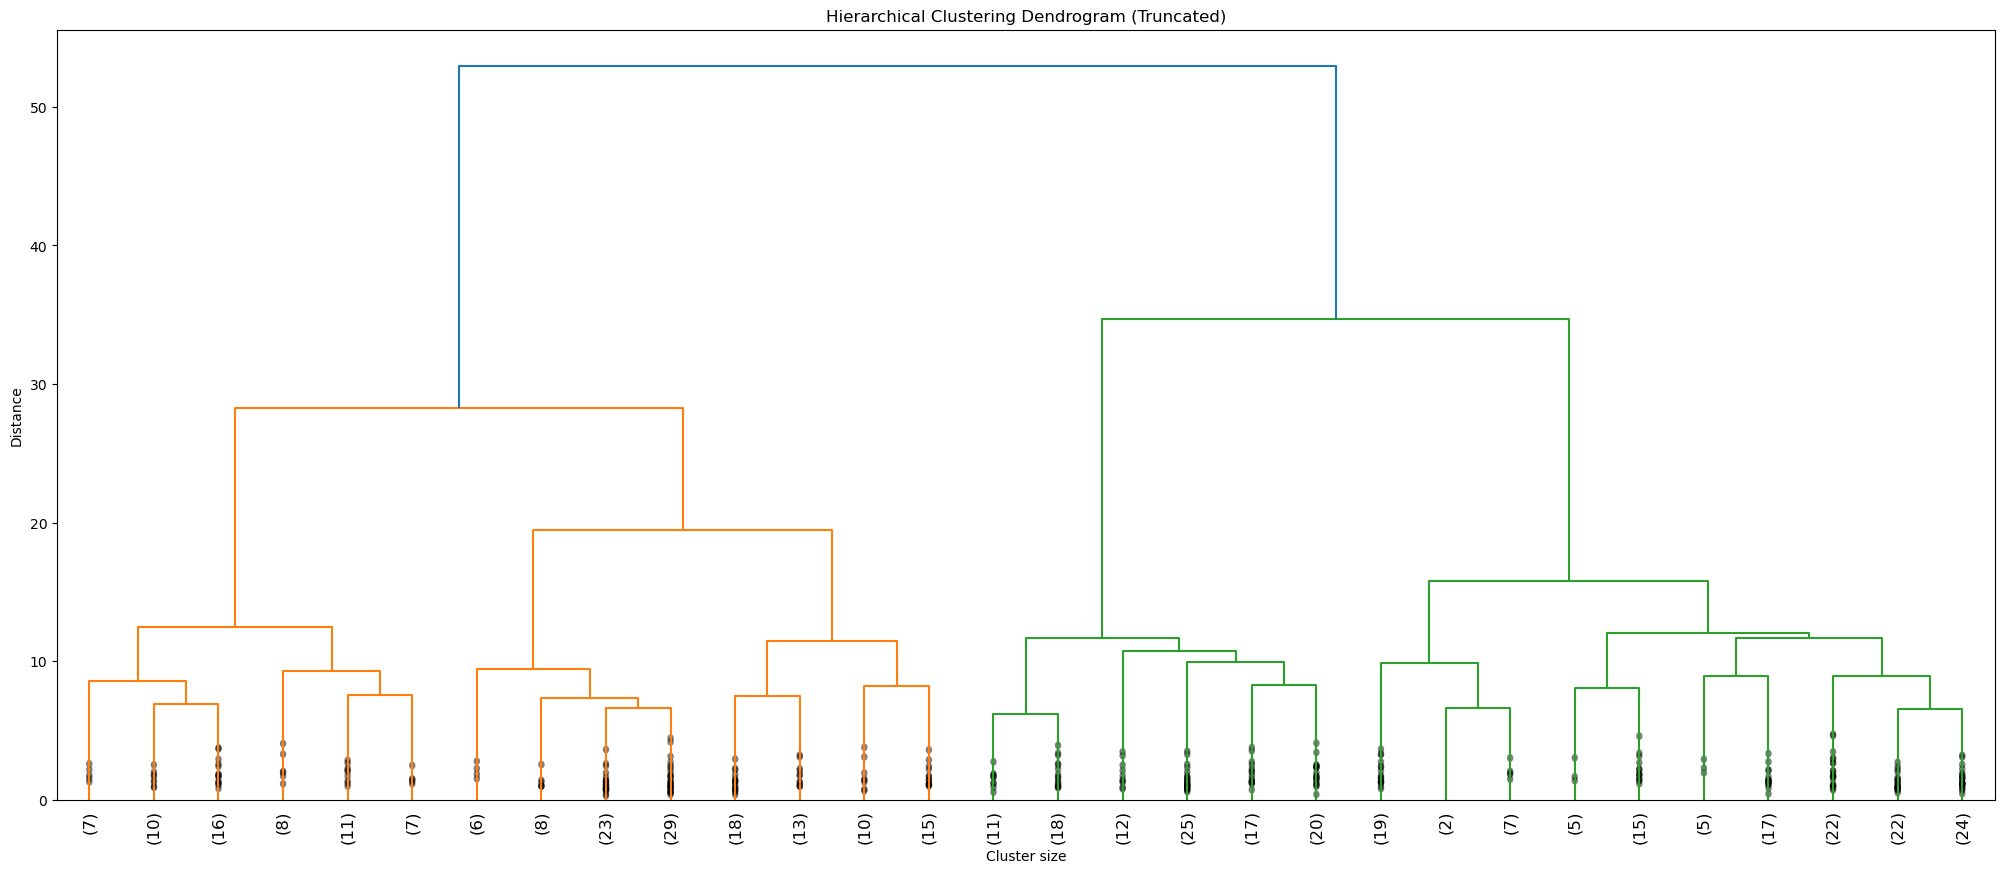

In [136]:
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a compacted visual representation of the dendrogram
)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()


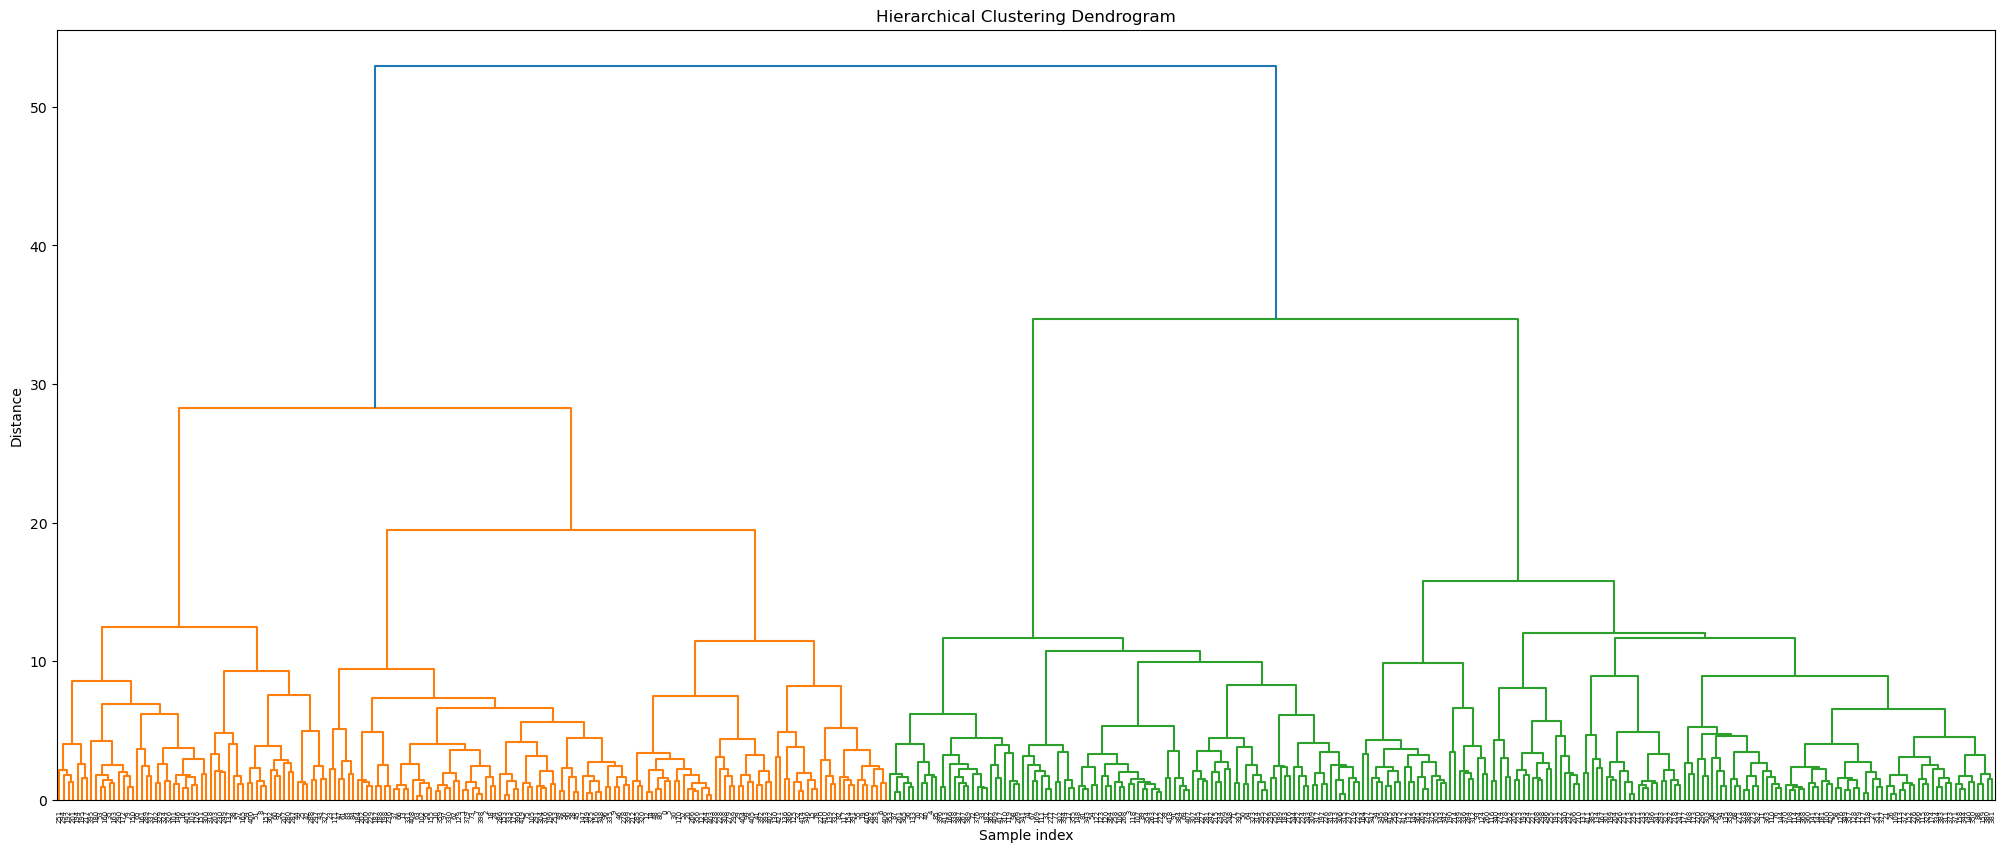

In [137]:
%matplotlib inline

# Plotting the dendrogram with increased figure size for better readability
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


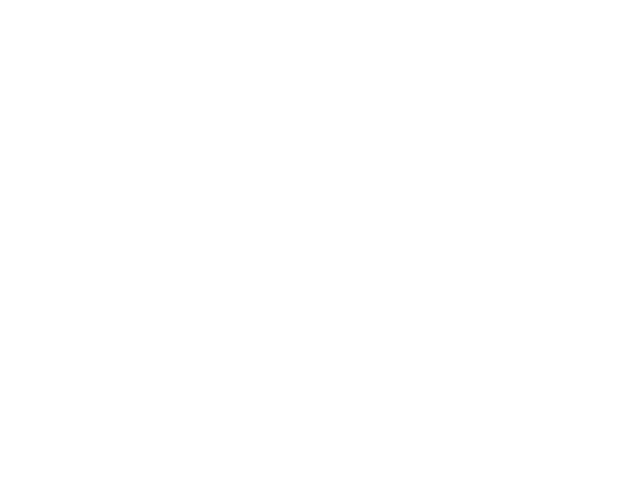

<Figure size 640x480 with 0 Axes>

In [138]:
# Save the figure to the current working directory
plt.savefig('dendrogram.png')

# Display the saved figure using IPython display
from IPython.display import Image
Image(filename='dendrogram.png')


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [139]:
from sklearn.preprocessing import StandardScaler

# Separating out the features (excluding any non-numeric columns)
features = data_cleaned.select_dtypes(include=[np.number])

# Standardizing the features
x = StandardScaler().fit_transform(features)


In [140]:
from sklearn.decomposition import PCA

# Apply PCA 
pca = PCA()
principalComponents = pca.fit_transform(x)

# To check how much variance is explained 
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[0.40620791 0.17478942 0.11585696 0.08697166 0.07659729 0.05952149
 0.03840386 0.02435109 0.01730032]


In [141]:
# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# 95% of the variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components explaining 95% variance: {num_components}")


Number of components explaining 95% variance: 7


In [142]:
# Apply PCA with the number of components that explain 95% variance
pca = PCA(n_components=num_components)
principalComponents = pca.fit_transform(x)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=[f'PC{i}' for i in range(1, num_components+1)])


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Dimensionality Reduction: The PCA analysis has reduced the dimensionality of the data from nine features to seven principal components, which still capture 95% of the variance in the dataset. This simplification retains the core information while potentially reducing noise and improving the efficiency of subsequent analyses.

Variance Concentration: The first principal component (PC1) accounts for approximately 40.6% of the variance, and the second (PC2) for 17.5%, indicating that these two components alone capture more than half of the variance within the dataset. This suggests that a large part of customer behavior can be summarized with just these two components.

Dominant Features: The high variance captured by the first few principal components suggests that there are specific compound combinations of features that are more informative. For instance, PC1 might represent a general 'size of spending' across all categories, while PC2 might capture the contrast between different types of spending (e.g., fresh vs. non-fresh products).

Cluster Analysis and Customer Segmentation: The transformed dataset with seven principal components is now ready for further unsupervised learning tasks, such as cluster analysis, which can potentially reveal distinct customer segments more clearly than the original nine-dimensional data.